In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df = pd.read_csv('data/201402_trip_data.csv',parse_dates=['start_date','end_date'])
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [29]:
df['month'] = df['start_date'].apply(lambda x: x.month)
df['dayofweek'] = df['start_date'].apply(lambda x: x.dayofweek)
df['hour'] = df['start_date'].apply(lambda x: x.hour)
df['date'] = df['start_date'].apply(lambda x: x.date())

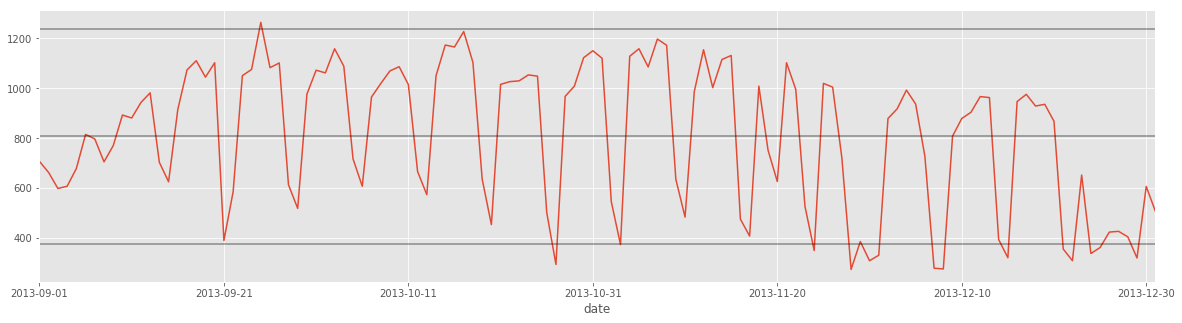

In [28]:
yearend = df[df['month'] > 8].groupby('date').count()['trip_id']
mean = yearend.mean()
std = yearend.std()
yearend.plot(figsize=(20,5))
plt.axhline(mean, c='black', alpha=.4)
plt.axhline(mean + 1.5 * std, c='black', alpha=.4)
plt.axhline(mean - 1.5 * std, c='black', alpha=.4)
plt.show()

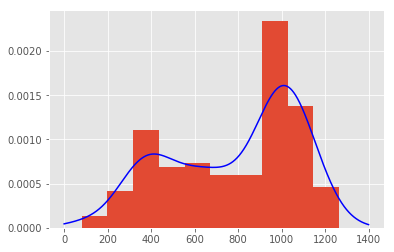

In [36]:
from scipy.stats.kde import gaussian_kde
samp = df.groupby('date').count()['trip_id']
kde = gaussian_kde(samp)
x = np.linspace(0,1400,1400)
plt.plot(x,kde(x),'b')
samp.hist(normed=True)
plt.show()

In [37]:
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,month,dayofweek,hour,date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,8,3,14,2013-08-29
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,8,3,14,2013-08-29
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,8,3,10,2013-08-29
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,8,3,11,2013-08-29
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,8,3,12,2013-08-29


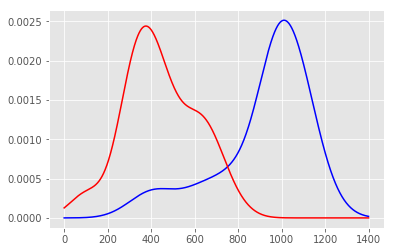

In [40]:
weekenddf = df[df['dayofweek'] > 4]
weekdaydf = df[df['dayofweek'] < 5]
weekday = weekdaydf.groupby('date').count()['trip_id']
weekend = weekenddf.groupby('date').count()['trip_id']
kdeweekday = gaussian_kde(weekday)
kdeweekend = gaussian_kde(weekend)
x = np.linspace(0,1400,1400)
plt.plot(x,kdeweekday(x),'b')
plt.plot(x,kdeweekend(x),'r')
plt.show()

In [68]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
y = prestige['prestige']
x = prestige[['income', 'education']].astype(float)
x = sm.add_constant(x)

/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  
/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/plotting/_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


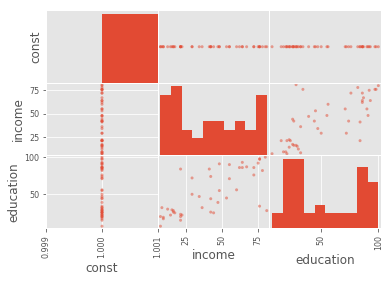

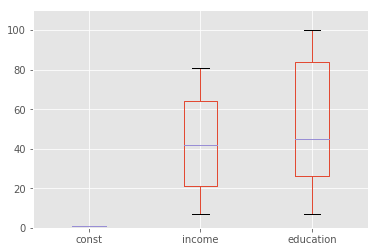

In [69]:
# Scatter Matrix
pd.scatter_matrix(x)
plt.show()

# Boxplot
x.boxplot()
plt.ylim(0, 110)
plt.show()

In [70]:
import statsmodels.api as sms
model = sms.OLS(y, x).fit()
summary = model.summary()

In [72]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 07 Jan 2018   Prob (F-statistic):           8.65e-17
Time:                        18:22:33   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.1